In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

#import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
city = citipy.nearest_city(22.99,120.21)
city

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

labuhan id
saskylakh ru
basco ph
craig us
krivodol bg
rio grande br
punta arenas cl
nchelenge zm
ushuaia ar
lavrentiya ru
souillac mu
puerto ayora ec
qaanaaq gl
flin flon ca
qaanaaq gl
victoria sc
mataura pf
jamestown sh
sydney au
kodiak us
kapaa us
hilo us
ribeira grande pt
mar del plata ar
mareeba au
taolanaro mg
henties bay na
punta arenas cl
tumannyy ru
naryan-mar ru
punta arenas cl
atuona pf
brae gb
ponta do sol cv
albany au
castro cl
tynda ru
punta arenas cl
tsihombe mg
hermanus za
port hawkesbury ca
bengkulu id
bredasdorp za
shimoda jp
kawhia nz
shumyachi ru
rikitea pf
westport ie
new norfolk au
port alfred za
bengkulu id
rikitea pf
asau tv
umm bab qa
kapaa us
bluff nz
tiksi ru
butaritari ki
victoria sc
half moon bay us
vaini to
georgetown sh
hermanus za
saint-pierre pm
yellowknife ca
barentsburg sj
east london za
taolanaro mg
maldonado uy
saint-philippe re
hilo us
bredasdorp za
ayan ru
campbell river ca
lahij ye
anjiang cn
high level ca
tasiilaq gl
santarem br
albany au
bambous

tazovskiy ru
sentyabrskiy ru
tiksi ru
ilulissat gl
hilo us
sassandra ci
istok ru
bluff nz
runcorn gb
vila velha br
yumen cn
qaanaaq gl
taolanaro mg
skegness gb
jieshi cn
upernavik gl
tsihombe mg
ushuaia ar
punta arenas cl
nara ml
magadan ru
calvinia za
saint george bm
rikitea pf
estelle us
bredasdorp za
butaritari ki
ribeira grande pt
yellowknife ca
esperance au
saskylakh ru
mar del plata ar
portobelo pa
hithadhoo mv
joao pinheiro br
bengkulu id
greensburg us
oktyabrskoye ru
yulara au
rikitea pf
maceio br
nanortalik gl
beringovskiy ru
manokwari id
ajdabiya ly
mataura pf
ha giang vn
junagarh in
puerto ayora ec
henties bay na
cape town za
san cristobal ec
marystown ca
attawapiskat ca
rusape zw
tokamachi jp
vila franca do campo pt
chuy uy
new norfolk au
punta arenas cl
narsaq gl
lagoa pt
caravelas br
albany au
khatanga ru
betioky mg
attawapiskat ca
ponnani in
ilulissat gl
mataura pf
dunedin nz
fort nelson ca
hervey bay au
avarua ck
apac ug
esperance au
carnarvon au
kashi cn
burgersdorp za

klaksvik fo
bluff nz
arraial do cabo br
cabo san lucas mx
ushuaia ar
hermanus za
taolanaro mg
hobart au
les herbiers fr
itarema br
saskylakh ru
hermanus za
faanui pf
castro cl
hermanus za
albany au
ushuaia ar
vilyuysk ru
albany au
aitape pg
baiyin cn
mitu co
celestun mx
cardston ca
albany au
bethel us
bambous virieux mu
norman wells ca
austin us
chuy uy
sambava mg
paamiut gl
sao geraldo do araguaia br
milford us
lorengau pg
sao felix do xingu br
cherskiy ru
santa fe cu
ponta do sol cv
ankang cn
keti bandar pk
taolanaro mg
upernavik gl
humberto de campos br
barentsburg sj
tuktoyaktuk ca
zachagansk kz
mergui mm
jinchengjiang cn
ushuaia ar
vaini to
mataura pf
iqaluit ca
nome us
mackenzie ca
khatanga ru
georgetown sh
mahebourg mu
yellowknife ca
biltine td
longyearbyen sj
rikitea pf
kahului us
illoqqortoormiut gl
catuday ph
ushuaia ar
petropavlovsk-kamchatskiy ru
leningradskiy ru
paragould us
hermanus za
husavik is
radovis mk
yellowknife ca
punta arenas cl
albany au
arraial do cabo br
puert

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2167aa2970a420bab9866a853b071f9


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | labuhan
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | basco
Processing Record 4 of Set 1 | craig
Processing Record 5 of Set 1 | krivodol
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | nchelenge
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | lavrentiya
Processing Record 11 of Set 1 | souillac
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | flin flon
Processing Record 15 of Set 1 | victoria
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | sydney
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | ribeira grande
Processing Record 23 of Set 1 | mar del plata


Processing Record 41 of Set 4 | aukra
Processing Record 42 of Set 4 | caravelas
Processing Record 43 of Set 4 | tarbagatay
Processing Record 44 of Set 4 | samusu
City not found. Skipping...
Processing Record 45 of Set 4 | kasongo-lunda
Processing Record 46 of Set 4 | maraa
Processing Record 47 of Set 4 | whitehorse
Processing Record 48 of Set 4 | antalaha
Processing Record 49 of Set 4 | ilulissat
Processing Record 50 of Set 4 | cabo san lucas
Processing Record 1 of Set 5 | saint-leu
Processing Record 2 of Set 5 | san quintin
Processing Record 3 of Set 5 | kyritz
Processing Record 4 of Set 5 | goderich
Processing Record 5 of Set 5 | abu jubayhah
City not found. Skipping...
Processing Record 6 of Set 5 | macusani
Processing Record 7 of Set 5 | barra patuca
Processing Record 8 of Set 5 | yibin
Processing Record 9 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 5 | klaksvik
Processing Record 11 of Set 5 | yatou
Processing Record 12 of Set 5 | nuuk
Proces

Processing Record 30 of Set 8 | fort nelson
Processing Record 31 of Set 8 | apac
Processing Record 32 of Set 8 | kashi
Processing Record 33 of Set 8 | burgersdorp
Processing Record 34 of Set 8 | homer
Processing Record 35 of Set 8 | zhigalovo
Processing Record 36 of Set 8 | tahoua
Processing Record 37 of Set 8 | arys
Processing Record 38 of Set 8 | huangmei
Processing Record 39 of Set 8 | haines junction
Processing Record 40 of Set 8 | abu dhabi
Processing Record 41 of Set 8 | aureliana
Processing Record 42 of Set 8 | dingle
Processing Record 43 of Set 8 | novikovo
Processing Record 44 of Set 8 | lazaro cardenas
Processing Record 45 of Set 8 | lorengau
Processing Record 46 of Set 8 | primorsk
Processing Record 47 of Set 8 | lieksa
Processing Record 48 of Set 8 | znamenskoye
Processing Record 49 of Set 8 | sabha
Processing Record 50 of Set 8 | ugoofaaru
Processing Record 1 of Set 9 | sur
Processing Record 2 of Set 9 | brazzaville
Processing Record 3 of Set 9 | pueblo
Processing Record 4

Processing Record 16 of Set 12 | plastun
Processing Record 17 of Set 12 | eldorado
Processing Record 18 of Set 12 | mujiayingzi
Processing Record 19 of Set 12 | rafai
Processing Record 20 of Set 12 | marzuq
Processing Record 21 of Set 12 | eyl
Processing Record 22 of Set 12 | matara
Processing Record 23 of Set 12 | inhambane
Processing Record 24 of Set 12 | carauari
Processing Record 25 of Set 12 | north battleford
Processing Record 26 of Set 12 | cockburn town
Processing Record 27 of Set 12 | les herbiers
Processing Record 28 of Set 12 | itarema
Processing Record 29 of Set 12 | vilyuysk
Processing Record 30 of Set 12 | aitape
Processing Record 31 of Set 12 | baiyin
Processing Record 32 of Set 12 | mitu
Processing Record 33 of Set 12 | celestun
Processing Record 34 of Set 12 | cardston
Processing Record 35 of Set 12 | austin
Processing Record 36 of Set 12 | sambava
Processing Record 37 of Set 12 | sao geraldo do araguaia
Processing Record 38 of Set 12 | milford
Processing Record 39 of 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Labuhan,-6.88,112.21,86.86,67,78,10.47,ID,2020-11-04 06:03:09
1,Saskylakh,71.92,114.08,-0.45,92,92,4.14,RU,2020-11-04 05:59:51
2,Basco,20.45,121.97,78.13,73,100,26.89,PH,2020-11-04 06:03:10
3,Craig,40.52,-107.55,42.80,74,75,3.36,US,2020-11-04 06:03:10
4,Krivodol,43.37,23.48,54.09,82,100,6.76,BG,2020-11-04 06:03:10
5,Rio Grande,-32.03,-52.10,57.99,80,4,3.00,BR,2020-11-04 06:03:10
6,Punta Arenas,-53.15,-70.92,44.60,93,90,12.75,CL,2020-11-04 06:03:10
7,Nchelenge,-9.35,28.73,76.33,64,100,4.25,ZM,2020-11-04 05:59:22
8,Ushuaia,-54.80,-68.30,48.20,57,75,3.36,AR,2020-11-04 05:55:41
9,Lavrentiya,65.58,-171.00,16.09,82,0,7.92,RU,2020-11-04 06:03:11


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Labuhan,ID,2020-11-04 06:03:09,-6.88,112.21,86.86,67,78,10.47
1,Saskylakh,RU,2020-11-04 05:59:51,71.92,114.08,-0.45,92,92,4.14
2,Basco,PH,2020-11-04 06:03:10,20.45,121.97,78.13,73,100,26.89
3,Craig,US,2020-11-04 06:03:10,40.52,-107.55,42.80,74,75,3.36
4,Krivodol,BG,2020-11-04 06:03:10,43.37,23.48,54.09,82,100,6.76
5,Rio Grande,BR,2020-11-04 06:03:10,-32.03,-52.10,57.99,80,4,3.00
6,Punta Arenas,CL,2020-11-04 06:03:10,-53.15,-70.92,44.60,93,90,12.75
7,Nchelenge,ZM,2020-11-04 05:59:22,-9.35,28.73,76.33,64,100,4.25
8,Ushuaia,AR,2020-11-04 05:55:41,-54.80,-68.30,48.20,57,75,3.36
9,Lavrentiya,RU,2020-11-04 06:03:11,65.58,-171.00,16.09,82,0,7.92


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

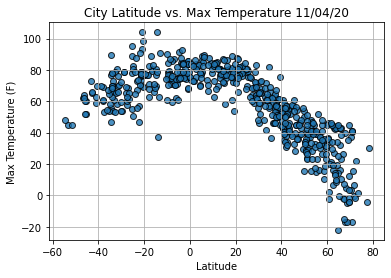

In [16]:
%matplotlib inline

import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

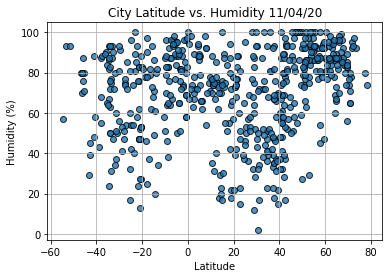

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

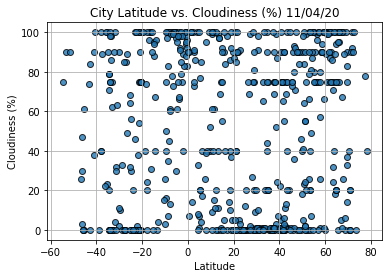

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

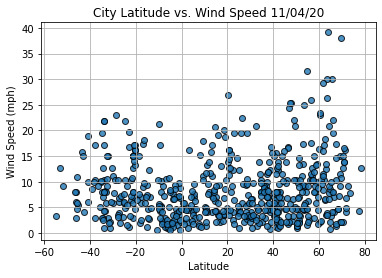

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                    Flin Flon
Country                        CA
Date          2020-11-04 06:00:01
Lat                         54.77
Lng                       -101.86
Max Temp                    32.52
Humidity                       97
Cloudiness                    100
Wind Speed                    1.5
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
576    False
577     True
578     True
579     True
580     True
Name: Lat, Length: 581, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Labuhan,ID,2020-11-04 06:03:09,-6.88,112.21,86.86,67,78,10.47
1,Saskylakh,RU,2020-11-04 05:59:51,71.92,114.08,-0.45,92,92,4.14
2,Basco,PH,2020-11-04 06:03:10,20.45,121.97,78.13,73,100,26.89
3,Craig,US,2020-11-04 06:03:10,40.52,-107.55,42.80,74,75,3.36
4,Krivodol,BG,2020-11-04 06:03:10,43.37,23.48,54.09,82,100,6.76
5,Rio Grande,BR,2020-11-04 06:03:10,-32.03,-52.10,57.99,80,4,3.00
6,Punta Arenas,CL,2020-11-04 06:03:10,-53.15,-70.92,44.60,93,90,12.75
7,Nchelenge,ZM,2020-11-04 05:59:22,-9.35,28.73,76.33,64,100,4.25
8,Ushuaia,AR,2020-11-04 05:55:41,-54.80,-68.30,48.20,57,75,3.36
9,Lavrentiya,RU,2020-11-04 06:03:11,65.58,-171.00,16.09,82,0,7.92


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [31]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Saskylakh,RU,2020-11-04 05:59:51,71.92,114.08,-0.45,92,92,4.14
2,Basco,PH,2020-11-04 06:03:10,20.45,121.97,78.13,73,100,26.89
3,Craig,US,2020-11-04 06:03:10,40.52,-107.55,42.80,74,75,3.36
4,Krivodol,BG,2020-11-04 06:03:10,43.37,23.48,54.09,82,100,6.76
9,Lavrentiya,RU,2020-11-04 06:03:11,65.58,-171.00,16.09,82,0,7.92


In [32]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Labuhan,ID,2020-11-04 06:03:09,-6.88,112.21,86.86,67,78,10.47
5,Rio Grande,BR,2020-11-04 06:03:10,-32.03,-52.10,57.99,80,4,3.00
6,Punta Arenas,CL,2020-11-04 06:03:10,-53.15,-70.92,44.60,93,90,12.75
7,Nchelenge,ZM,2020-11-04 05:59:22,-9.35,28.73,76.33,64,100,4.25
8,Ushuaia,AR,2020-11-04 05:55:41,-54.80,-68.30,48.20,57,75,3.36


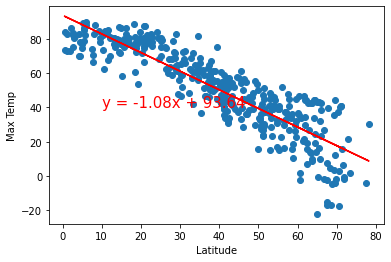

In [45]:
# Linear regression on the Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values_northern, y_values_northern,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


In [46]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values_northern, y_values_northern)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value:.3f}")

y = -1.08x + 93.64
The p-value is: 0.000
The r-value is: -0.879


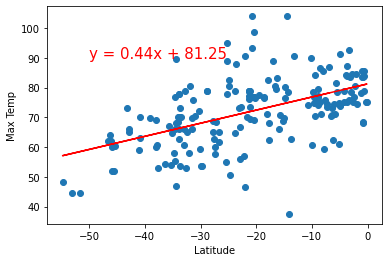

In [47]:
# Linear regression on the Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values_southern, y_values_southern,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))


In [48]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values_southern, y_values_southern)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value:.3f}")

y = 0.44x + 81.25
The p-value is: 0.000
The r-value is: 0.524


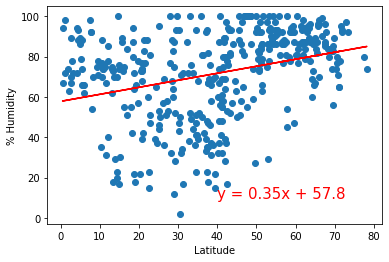

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

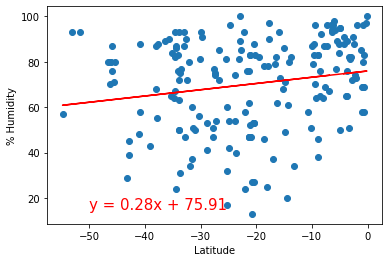

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

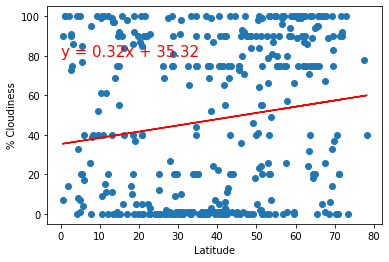

In [53]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(0,80))


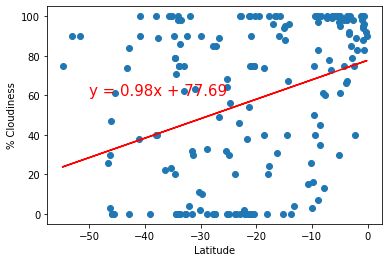

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

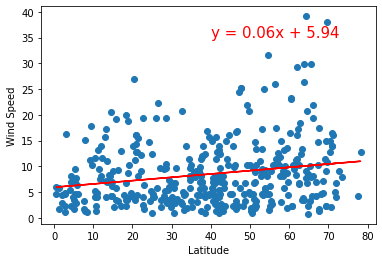

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

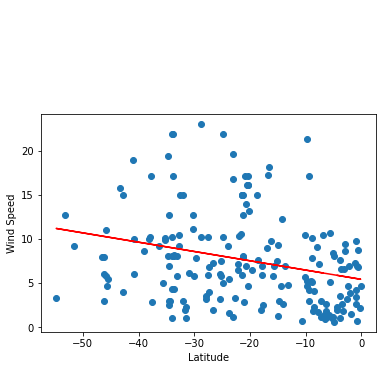

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))